In [1]:
## importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading data

data=pd.read_csv("haberman.csv")

In [3]:
## viewing the loaded data

a=data.shape
print("Our data as {} data points and {} features".format(a[0],a[1]))

data.head()

Our data as 306 data points and 4 features


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### objective
Since our objective is to find if a given patient will survive more than 5 year after the surgery or die within 5 year after the surgery given on informations like age of patient, year of surgery and number of positive axillary nodes detected.

Here we can see that all the given data are integers but we are interested in finding the survival status, so for that we will categorize the status value(yes or no)  'Yes' for 1=patient survived 5 year or longer and 'No' for 2=patient died within 5 year after surgery.

In [4]:
## converitng the status column to categorical variables

data['status']=data['status'].map({1:'Yes',2:'No'})

In [5]:
## reviewing data
data.head()

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [6]:
## checking for any missing value 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   306 non-null    int64 
 3   status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


### Observation
Since from the above informations we can see that all the 4 columns are filled i.e, there is no problem of missing value.
Now we can proceed our analysis.

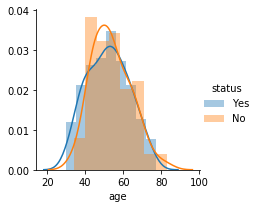

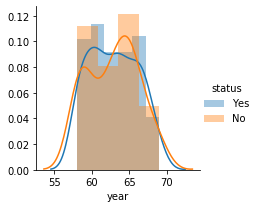

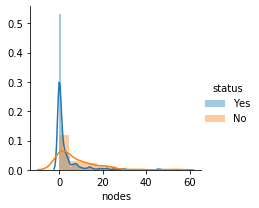

In [13]:
## creating 1-D plots 

## calculating pdf's

sns.FacetGrid(data,hue='status')\
   .map(sns.distplot,'age')\
   .add_legend()


sns.FacetGrid(data,hue='status')\
   .map(sns.distplot,'year')\
   .add_legend()


sns.FacetGrid(data,hue='status')\
   .map(sns.distplot,'nodes')\
   .add_legend()


plt.show()



### Observation

1. From the age plot we can say that there is huge overlapping of pdf, so we cannot clearly distinguish between the probability of survival based on age; but we can see that as compared to other age patients, survival rate of patient of age 50 is greater and after age of 60 patients have equal chances of survival and death as the pdf are overlapping.

2. From the distribution plot we can se that all though there is also huge overlapping but year 1965 have witnessed most of the unsuccesfull surgeries as this year has faced many patients death.
Also year 1960 have maximum successfull surgeries as it have high survival status.

3. From third plot i.e, plot of nodes we can see that majority of the patient have active nodes in range 0-5 and there is maximum change of survival if a patient have o or 1 active nodes. We can also see that if a patient have more than 15 active nodes then its chances of survival is very low. 




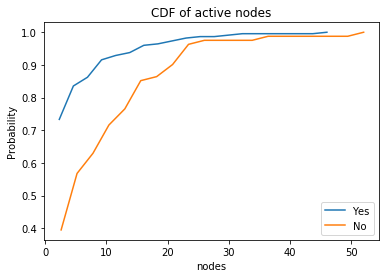

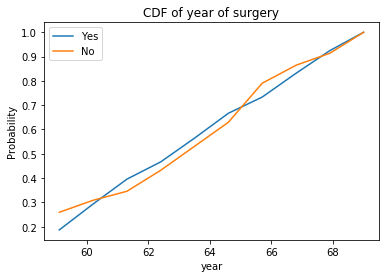

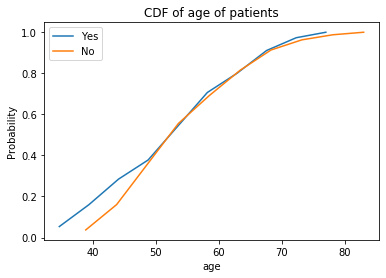

In [8]:
status_yes= data.loc[data["status"] == "Yes"]
status_no= data.loc[data["status"] == "No"]

## calculating cdf for nodes

counts1, bin_edges1 = np.histogram(status_yes['nodes'], bins=20, density = True)
pdf1 = counts1/(sum(counts1))
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
counts2, bin_edges2 = np.histogram(status_no['nodes'], bins=20, density = True)
pdf2 = counts2/(sum(counts2))
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.title('CDF of active nodes')
plt.xlabel('nodes')
plt.ylabel('Probability')
plt.legend()
plt.show()

## calculating cdf for year of surgery

counts1, bin_edges1 = np.histogram(status_yes['year'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('year')
counts2, bin_edges2 = np.histogram(status_no['year'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.title("CDF of year of surgery")
plt.xlabel('year')
plt.ylabel('Probability')
plt.legend()
plt.show()


## calculating cdf for age of patient

counts1, bin_edges1 = np.histogram(status_yes['age'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('age')
counts2, bin_edges2 = np.histogram(status_no['age'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.title('CDF of age of patients')
plt.xlabel('age')
plt.ylabel('Probability')
plt.legend()
plt.show()



### observation

1. From the cdf of active nodes present we can see that 
if a patient have less than 5 active nodes then the probability of 
survival is 85% which is much more than probability of death(45%).
And also upto 10 active nodes the probability of survival is 90% but after that 
probability of death starts increasing and after 20 nodes it becomes same as probability of survival. SO if a patient have greater than 20 active nodes its chances of survial is very less.


2. From the second plot we can see that after year 1961 probability of survival is slightly greater till 1965  
but after that probability of death is more i.e, success rate of surgeries is not increasing and remain close to unsuccessfull surgeries.
Since the curves are not much separated we cannot strictly say that survival rate has anything to relate with surgeries directly.



3. From the third plot we can infere that till the age of 50 a patient have higher chances of survival but after the age of 50 we cannot say that age is factor 
for survival as the graphs are very closely overlapping.

In [9]:
## obtaining mean, std. deviation and percentiles

print(data.describe())

              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


			BOX PLOT


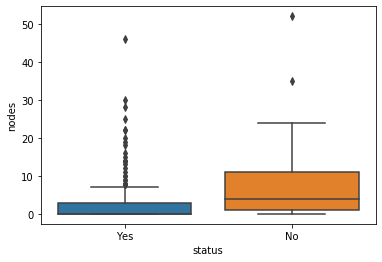

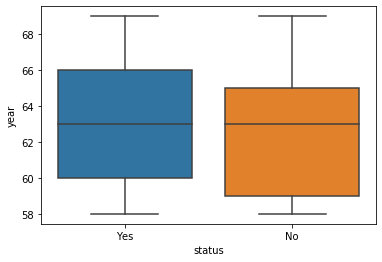

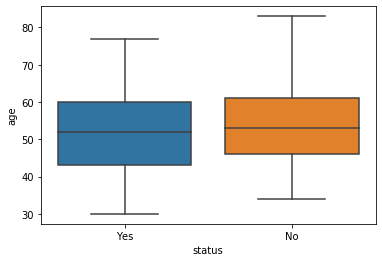



			VIOLIN PLOT


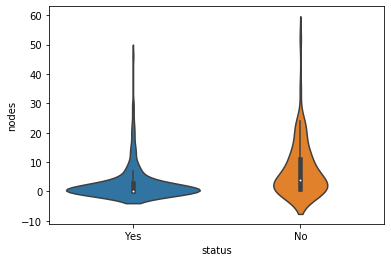

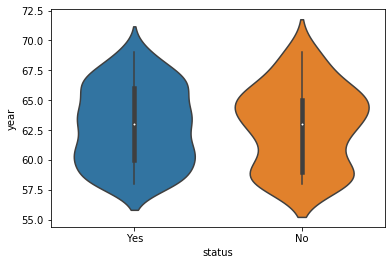

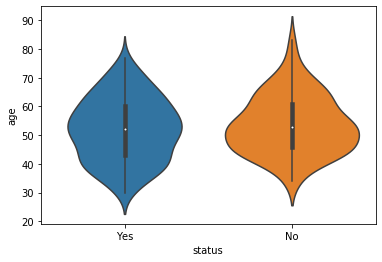

In [10]:
## plotting Box plots and violine plots
print('\t\t\tBOX PLOT')
sns.boxplot(x='status',y='nodes',data=data)
plt.show()

sns.boxplot(x='status',y='year',data=data)
plt.show()

sns.boxplot(x='status',y='age',data=data)
plt.show()


print('\n\n\t\t\tVIOLIN PLOT')
sns.violinplot(x='status',y='nodes',data=data)
plt.show()
sns.violinplot(x='status',y='year',data=data)
plt.show()
sns.violinplot(x='status',y='age',data=data)
plt.show()


### observaions
From the first box plot and violin plot of status and nodes we can observe that 
75% percentage of patients having 0 or 1 nodes have chances of survival more than 5 years after operation.

From second plot of status and operation year we can see that 50th percentile value of both the status i.e, survial and death 
are almost equal; which means that there is equal chances of survival and death for patients having surgeries till year 1963 since 50th percentile value is 1963 for both status.


Box plot and violn plot of age and status for both the cases have substancial overlapping of data points. Hence this doesnot provide any valid evidence to make separate conculusions for both the categories(survial and death).


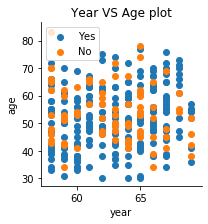

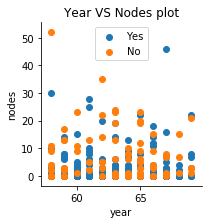

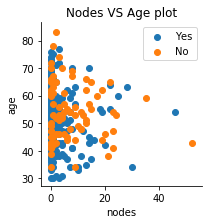

In [11]:
## plotting 2-D scatter plots
sns.FacetGrid(data, hue='status')\
   .map(plt.scatter,"year","age")
plt.title("Year VS Age plot")
plt.legend()

sns.FacetGrid(data, hue='status')\
   .map(plt.scatter,"year","nodes")
plt.title("Year VS Nodes plot")
plt.legend()

sns.FacetGrid(data, hue='status')\
   .map(plt.scatter,"nodes","age")
plt.title("Nodes VS Age plot")
plt.legend()



plt.show()


### observations

From above 2D scatter plots we can see that there doesnot exist any clear relationship throughout all the combination of values.

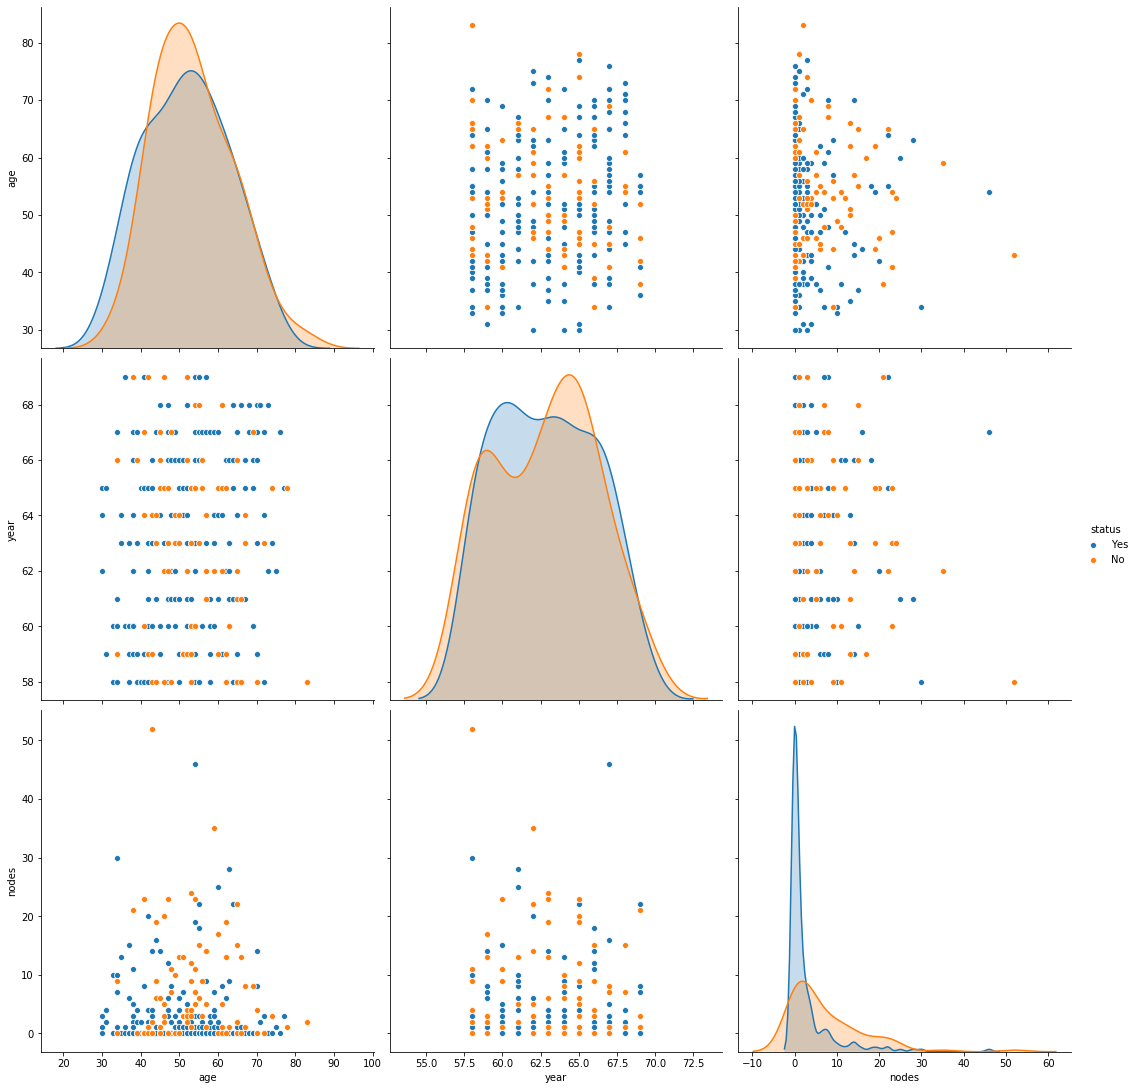

In [14]:
## creating pair plots

sns.pairplot(data,hue='status',height=5)
plt.show()

### observation

Among all the plots, plot 3 which is of age and nodes are more useful as we can see that patient of below age 40 have very less active nodes.

Secondly, from the histogram of year we can see that year 1960 have maximum number of successfull operations whereas year 1965 have maximum number of unsuccessfull operations.

From the last histogram plot we can see that patients having less active nodes(0-2) have maximum chances of surviving grater than 5 years after surgery.
We cannot make exact conculsions from rest of the plots as they are more homogeneous in nature so exact relationships cannot be stated.

Hence we can say that combination of features are not much useful.